In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
import cartopy.crs as ccrs
import numpy as np

var="clivi"

In [2]:
if var=="clivi":
    var_ni = xr.open_dataset(ap.get_timmean_file("NICAM", var))[var]
    var_sa = xr.open_dataset(ap.get_timmean_file("SAM", var))[var]
    var_sc = xr.open_dataset(ap.get_timmean_file("SCREAMr", var))[var]
    var_ge = xr.open_dataset(ap.get_timmean_file("GEOS", var))[var]
elif (var=="rlt") or (var=="rlut"):
    var_ni = xr.open_dataset(ap.get_timmean_file("NICAM", "rlut"))["rlut"]
    var_sa = xr.open_dataset(ap.get_timmean_file("SAM", "rlt"))["rlt"]
    var_sc = xr.open_dataset(ap.get_timmean_file("SCREAMr", "rlt"))["rlt"]
    var_ge = xr.open_dataset(ap.get_timmean_file("GEOS", "rlut"))["rlut"]

var_sc

<xarray.DataArray 'clivi' (time: 1, grid_size: 12249232)>
[12249232 values with dtype=float32]
Coordinates:
  * time             (time) object 2020-02-10 11:52:30
    grid_center_lon  (grid_size) float64 ...
    grid_center_lat  (grid_size) float64 ...
Dimensions without coordinates: grid_size
Attributes:
    standard_name:  atmosphere_mass_content_of_cloud_ice
    long_name:      CLDICE column burden
    units:          kg m-2
    CDI_grid_type:  unstructured
    origin:         TMCLDICE

In [12]:
# grid_x, grid_y = np.mgrid[0:360:10240j, -30:30:1706j]

# grid_z0 = griddata(var_ge.values, )

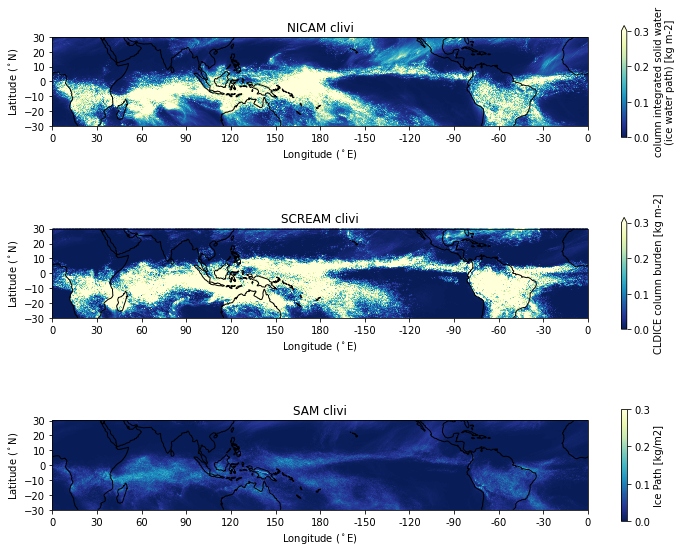

In [13]:
fig, [axni, axsc, axsa] = plt.subplots(3,1, figsize=(12,10), 
                                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)} )
cmap = "YlGnBu_r"
vmin, vmax = 0, 0.3
# vmin, vmax = 180, 310
models = ["NICAM", "SCREAM", "SAM", "GEOS"]

var_ni.isel(time=0).plot(
    ax=axni,
    transform=ccrs.PlateCarree(),  
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.7},
    robust=True
)
var_sc.isel(time=0).plot(
    ax=axsc,
    transform=ccrs.PlateCarree(),  
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.7},
    robust=True
)
var_sa.isel(time=0).plot(
    ax=axsa,
    transform=ccrs.PlateCarree(),  
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    cbar_kwargs={"orientation": "vertical", "shrink": 0.7},
    robust=True
)
# var_ge.isel(time=0).plot(
#     ax=axge,
#     transform=ccrs.PlateCarree(),  
#     cmap=cmap,
#     vmin=vmin, vmax=vmax,
#     cbar_kwargs={"orientation": "vertical", "shrink": 0.7},
#     robust=True
# )

for i, axis in enumerate([axni, axsc, axsa]):
    axis.coastlines() 
    axis.set_xticks(np.arange(-180,181,30))
    axis.set_xticklabels([0,30,60,90,120,150,180,-150,-120,-90,-60,-30,0])
    axis.set_yticks(np.arange(-30,31,10))
    axis.set_title(models[i]+" "+var)
    axis.set_xlabel("Longitude ($^\circ$E)")
    axis.set_ylabel("Latitude ($^\circ$N)")
plt.savefig("../plots/GT/timmean_{}.png".format(var), dpi=150)
plt.show()